# Deep Learning Tutorial

Deep learning is a subfield of machine learning that is a set of algorithms that is inspired by the structure and function of the brain. These algorithms are usually called Artificial Neural Networks (ANN). Deep learning is one of the hottest fields in data science with many case studies with marvelous results in robotics, image recognition and Artificial Intelligence (AI).Deep learning is a class of machine learning algorithms that: -->use a cascade of multiple layers of nonlinear processing units for feature extraction and transformation. Each successive layer uses the output from the previous layer as input. -->learn in supervised (e.g., classification) and/or unsupervised (e.g., pattern analysis) manners. -->learn multiple levels of representations that correspond to different levels of abstraction; the levels form a hierarchy of concepts. -->use some form of gradient descent for training via backpropagation.Deep learning exploits this idea of hierarchical explanatory factors[clarification needed] where higher level, more abstract concepts are learned from the lower level ones. Deep learning architectures are often constructed with a greedy layer-by-layer method. Deep learning helps to disentangle these abstractions and pick out which features are useful for improving performance. For supervised learning tasks, deep learning methods obviate feature engineering, by translating the data into compact intermediate representations akin to principal components, and derive layered structures that remove redundancy in representation. Deep learning algorithms can be applied to unsupervised learning tasks. This is an important benefit because unlabeled data are more abundant than labeled data. Examples of deep structures that can be trained in an unsupervised manner are neural history compressors perceptron could only represent linear separations between classes, the multi-layer perceptron overcomes that limitation and can also represent more complex decision boundaries.For the analysis I have considered the pollution causing agents data of different cities.

In [1]:
import os
import pandas as pd
import numpy as np
from numpy import *

In [2]:
data = pd.read_table("Pollution.csv", sep=',', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,State,NO201st0Max0Value,NO201st0Max0Hour,NO20AQI,O301st0Max0Hour,O30AQI,SO201st0Max0Value,SO201st0Max0Hour,SO20AQI,CO01st0Max0Value,CO01st0Max0Hour,CO0AQI
1,Arizona,49,19,46,10,34,9,21,13,4.2,21,0
2,Arizona,49,19,46,10,34,9,21,13,2.2,23,25
3,Arizona,49,19,46,10,34,6.6,23,0,4.2,21,0
4,Arizona,49,19,46,10,34,6.6,23,0,2.2,23,25


In [3]:
from sklearn.decomposition import PCA
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
a =le.fit_transform(data[0])
data[0]=a
data[0].head()

0    8
1    0
2    0
3    0
4    0
Name: 0, dtype: int64

In [5]:
data.loc[[0],0:1] = 1,2
data.loc[[0],2:3] = 3,4
data.loc[[0],4:5] = 5,6
data.loc[[0],6:7] = 7,8
data.loc[[0],8:9] = 9,10
data.loc[[0],10:11] = 11,12
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,2,3,4,5,6,7,8,9,10,11,12
1,0,49,19,46,10,34,9,21,13,4.2,21,0
2,0,49,19,46,10,34,9,21,13,2.2,23,25
3,0,49,19,46,10,34,6.6,23,0,4.2,21,0
4,0,49,19,46,10,34,6.6,23,0,2.2,23,25


In [6]:
list(data.columns.values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# Data Visualization

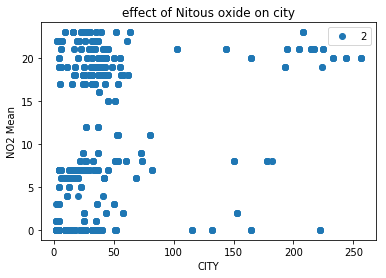

In [8]:
import matplotlib.pyplot as plt
data=data.astype(float)
data.plot(x=1, y=2, style='o')
plt.xlabel("CITY")
plt.ylabel("NO2 Mean")
plt.title("effect of Nitous oxide on city")
plt.show()

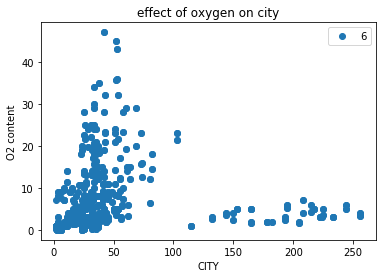

In [11]:
data=data.astype(float)
data.plot(x=1, y=6, style='o')
plt.xlabel("CITY")
plt.ylabel("O2 content")
plt.title("effect of oxygen on city")
plt.show()

# Preprocess Data

It’s time to act upon the insights that you have gained! Let’s preprocess the data so that you can start building your own neural network!Correlation Matrix: Now that you have the full data set, it’s a good idea to also do a quick data exploration; You already know some stuff from looking at the data set, and now it’s time to gather some more solid insights, perhaps. Since it can be somewhat difficult to interpret graphs, it’s also a good idea to plot a correlation matrix. This will give insights more quickly about which variables correlate:

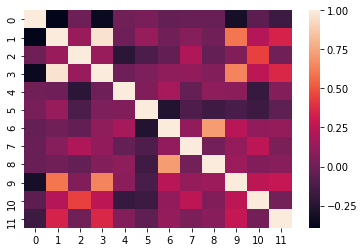

In [15]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Train and Test Sets

Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally.Most classification data sets do not have exactly equal number of instances in each class, but a small difference often does not matter.For now, import the train_test_split from sklearn.model_selection and assign the data and the target labels to the variables X and y.

In [17]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X=data.loc[:,0:11]
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
1,0.0,49.0,19.0,46.0,10.0,34.0,9.0,21.0,13.0,4.2,21.0,0.0
2,0.0,49.0,19.0,46.0,10.0,34.0,9.0,21.0,13.0,2.2,23.0,25.0
3,0.0,49.0,19.0,46.0,10.0,34.0,6.6,23.0,0.0,4.2,21.0,0.0
4,0.0,49.0,19.0,46.0,10.0,34.0,6.6,23.0,0.0,2.2,23.0,25.0


In [18]:
data_train=data

In [19]:
data1 = pd.read_table("Pollution.csv", sep=',', header=None)
data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,State,NO201st0Max0Value,NO201st0Max0Hour,NO20AQI,O301st0Max0Hour,O30AQI,SO201st0Max0Value,SO201st0Max0Hour,SO20AQI,CO01st0Max0Value,CO01st0Max0Hour,CO0AQI
1,Arizona,49,19,46,10,34,9,21,13,4.2,21,0
2,Arizona,49,19,46,10,34,9,21,13,2.2,23,25
3,Arizona,49,19,46,10,34,6.6,23,0,4.2,21,0
4,Arizona,49,19,46,10,34,6.6,23,0,2.2,23,25


In [20]:
from sklearn.decomposition import PCA
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
a =le.fit_transform(data1[0])
data1[0]=a
data1[0].head()

0    8
1    0
2    0
3    0
4    0
Name: 0, dtype: int64

In [21]:

data1.loc[[0],0:1] = 1,2
data1.loc[[0],2:3] = 3,4
data1.loc[[0],4:5] = 5,6
data1.loc[[0],6:7] = 7,8
data1.loc[[0],8:9] = 9,10
data1.loc[[0],10:11] = 11,12
data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,2,3,4,5,6,7,8,9,10,11,12
1,0,49,19,46,10,34,9,21,13,4.2,21,0
2,0,49,19,46,10,34,9,21,13,2.2,23,25
3,0,49,19,46,10,34,6.6,23,0,4.2,21,0
4,0,49,19,46,10,34,6.6,23,0,2.2,23,25


In [22]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X1=data1.loc[:,0:11]
X1.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,2,3,4,5,6,7,8,9,10,11,12
1,0,49,19,46,10,34,9,21,13,4.2,21,0
2,0,49,19,46,10,34,9,21,13,2.2,23,25
3,0,49,19,46,10,34,6.6,23,0,4.2,21,0
4,0,49,19,46,10,34,6.6,23,0,2.2,23,25


# Standardize the data

Standardization is a way to deal with these values that lie so far apart. The scikit-learn package offers you a great and quick way of getting your data standardized: import the StandardScaler module from sklearn.preprocessing and you’re ready to scale your train and test data!

In [24]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(data_train)

# Scale the train set
data_train = scaler.transform(data_train)

# Scale the test set
data_test = scaler.transform(data1)

Now that you’re data is preprocessed, you can move on to the real work: building your own neural network to classify pollution content.

# Model Data

Here we are building a multi-layer perceptron, this type of neural network is often fully connected. That means that you’re looking to build a fairly simple stack of fully-connected layers to solve this problem. As for the activation function that you will use, it’s best to use one of the most common ones here for the purpose of getting familiar with Keras and neural networks, which is the relu activation function.we create the model by passing a list of layer instances to the constructor, which you set up by running model = Sequential(). comming to the structure of the multi-layer perceptron we have an input layer, some hidden layers and an output layer. it’s therefore important to take into account that your first layer needs to make the input shape clear. The model needs to know what input shape to expect and that’s why you’ll always find the input_shape, input_dim, input_length, or batch_size arguments in the documentation of the layers and in practical examples of those layers. You are ending the network with a Dense layer of size 1. The final layer will also use a sigmoid activation function so that your output is actually a probability; This means that this will result in a score between 0 and 1, indicating how likely the sample is to have the target “1”, or how likely the data is to be from data_train.

In [27]:
from keras.utils import np_utils
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

Overfitting occurs when the model is too complex: it will describe random error or noise and not the underlying relationship that it needs to describe. In other words, the training data is modelled too well! Note that when you don’t have that much training data available, you should prefer to use a a small network with very few hidden layers. If you want to get some information on the model that you have just created, you can use the attributed output_shape or the summary() function, among others. Some of the most basic ones are listed below.Compile and fit the model and then predict values and evaluate model for correct creation of model.

# Compile and Fit

To compile your model and fit the model to the data: once again, make use of compile() and fit() to get this done. In compiling, you configure the model with the adam optimizer and the binary_crossentropy loss function. Additionally, you can also monitor the accuracy during the training by passing ['accuracy'] to the metrics argument.The optimizer and the loss are two arguments that are required if you want to compile the model We have to train the model for a specified number of epochs or exposures to the training dataset. An epoch is a single pass through the entire training set, followed by testing of the verification set. The batch size that you specify in the code above defines the number of samples that going to be propagated through the network. Also, by doing this, you optimize the efficiency because you make sure that you don’t load too many input patterns into memory at the same time.

# predict values

Let’s put your model to use! You can make predictions for the labels of the test set with it. Just use predict() and pass the test set to it to predict the labels for the data.

# Evaluate Models

Now that you have built your model and used it to make predictions on data that your model hadn’t seen yet, it’s time to evaluate it’s performance. You can visually compare the predictions with the actual test labels (y_test), or you can use all types of metrics to determine the actual performance. The score is a list that holds the combination of the loss and the accuracy.Before you start re-arranging the data and putting it together in a different way, it’s always a good idea to try out different evaluation metrics. For this, you can rely on scikit-learn (which you import as sklearn, just like before when you were making the train and test sets) for this. In this case, you will test out some basic classification evaluation techniques, such as: The confusion matrix, which is a breakdown of predictions into a table showing correct predictions and the types of incorrect predictions made. Ideally, you will only see numbers in the diagonal, which means that all your predictions were correct! Precision is a measure of a classifier’s exactness. The higher the precision, the more accurate the classifier. Recall is a measure of a classifier’s completeness. The higher the recall, the more cases the classifier covers. The F1 Score or F-score is a weighted average of precision and recall.